# log(CAMPO MAGNETICO) SU log(DISTANZA)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [8]:
def chi_quadro(funzione, popt, x, y, yerr):
    y_fit = funzione(x, *popt)  # Calcola i valori della funzione di fit
    chi2 = np.sum(((y - y_fit) / yerr) ** 2)  # Formula del chi quadro
    dof = len(x) - len(popt)  # Gradi di libertà
    return chi2 / dof  # Chi quadro ridotto

In [9]:
def retta(x, m, q):
    return m*x + q

## Magnete piccolo

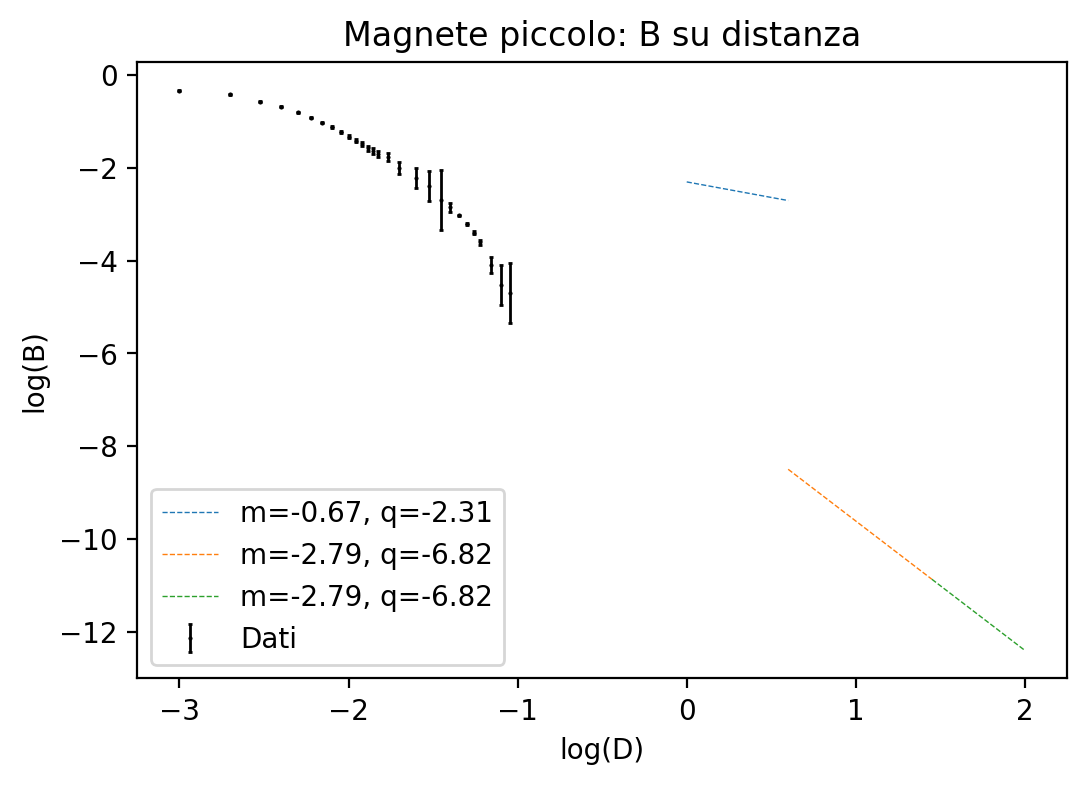

In [18]:
# Legge il file ignorando la prima riga (intestazione)
dati1 = np.loadtxt("data/magnete_piccolo_su_d.csv", skiprows=1)

d1 = dati1[:,1]   # ascissa
B1 = dati1[:,0]   # ordinata
err_B1 = dati1[:,2] # errore su B

## TOGLIERE IL PRIMO PUNTO? ##
d1 = d1[1:]   
B1 = B1[1:]   
err_B1 = err_B1[1:]*3

# CONVERTO IN METRI? #
d1 = d1 / 1000

# LOGARITMI
log_d1 = np.log10(d1)
log_B1 = np.log10(B1)
err_log_B1 = err_B1 / (B1 * np.log(10)) # Propagazione dell'errore

# FIT #
low = (-np.inf, -np.inf)
upp = (np.inf, np.inf)

# divido in tre regioni:
mask1_1 = (log_d1 < -2)
mask1_2 = (log_d1 > -2) & (log_d1 < -1)
mask1_3 = (log_d1 > -2) 
# regione 1
x1_1, y1_1, erry1_1 = log_d1[mask1_1], log_B1[mask1_1], err_log_B1[mask1_1]
popt1_1, pcov1_1 = curve_fit(retta, x1_1, y1_1, sigma=erry1_1, bounds=(low,upp))
# regione 2
x1_2, y1_2, erry1_2 = log_d1[mask1_2], log_B1[mask1_2], err_log_B1[mask1_2]
popt1_2, pcov1_2 = curve_fit(retta, x1_2, y1_2, sigma=erry1_2, bounds=(low,upp))
# regione 3
x1_3, y1_3, erry1_3 = log_d1[mask1_3], log_B1[mask1_3], err_log_B1[mask1_3]
popt1_3, pcov1_3 = curve_fit(retta, x1_3, y1_3, sigma=erry1_3, bounds=(low,upp))

plt.figure(figsize=(6, 4), dpi=200)
# dati
plt.errorbar(
    log_d1, log_B1, yerr=err_log_B1,
    fmt='o',  # Solo marker, senza linee tra i punti
    markersize=0.5,  # Dimensione dei marker leggermente aumentata
    elinewidth=1,  # Spessore delle barre d'errore ridotto per leggibilità
    capsize=0.8,  # Aggiunge terminali alle barre d'errore
    capthick=1,  # Spessore dei terminali
    color='black',  # Colore neutro per evitare distrazioni
    label='Dati'
)
# PLOT FIT #
# regione 1
x_fit1_1 = np.linspace(0, 0.6, 30)
y_fit1_1 = retta(x_fit1_1, *popt1_1)
etichetta1 = f"m={popt1_1[0]:.2f}, q={popt1_1[1]:.2f}"
plt.plot(x_fit1_1, y_fit1_1, linestyle='--', label=etichetta1, linewidth=0.5)
# regione 2
x_fit1_2 = np.linspace(0.6, 1.45, 30)
y_fit1_2 = retta(x_fit1_2, *popt1_2)
etichetta2 = f"m={popt1_2[0]:.2f}, q={popt1_2[1]:.2f}"
plt.plot(x_fit1_2, y_fit1_2, linestyle='--', label=etichetta2, linewidth=0.5)
# regione 1
x_fit1_3 = np.linspace(1.45, 2, 30)
y_fit1_3 = retta(x_fit1_3, *popt1_3)
etichetta3 = f"m={popt1_3[0]:.2f}, q={popt1_3[1]:.2f}"
plt.plot(x_fit1_3, y_fit1_3, linestyle='--', label=etichetta3, linewidth=0.5)

plt.xlabel("log(D)") # [mm]
#plt.yscale('log')
plt.ylabel("log(B)") # [T]
plt.title("Magnete piccolo: B su distanza")
plt.legend()
plt.show()

# MAGNETE GRANDE

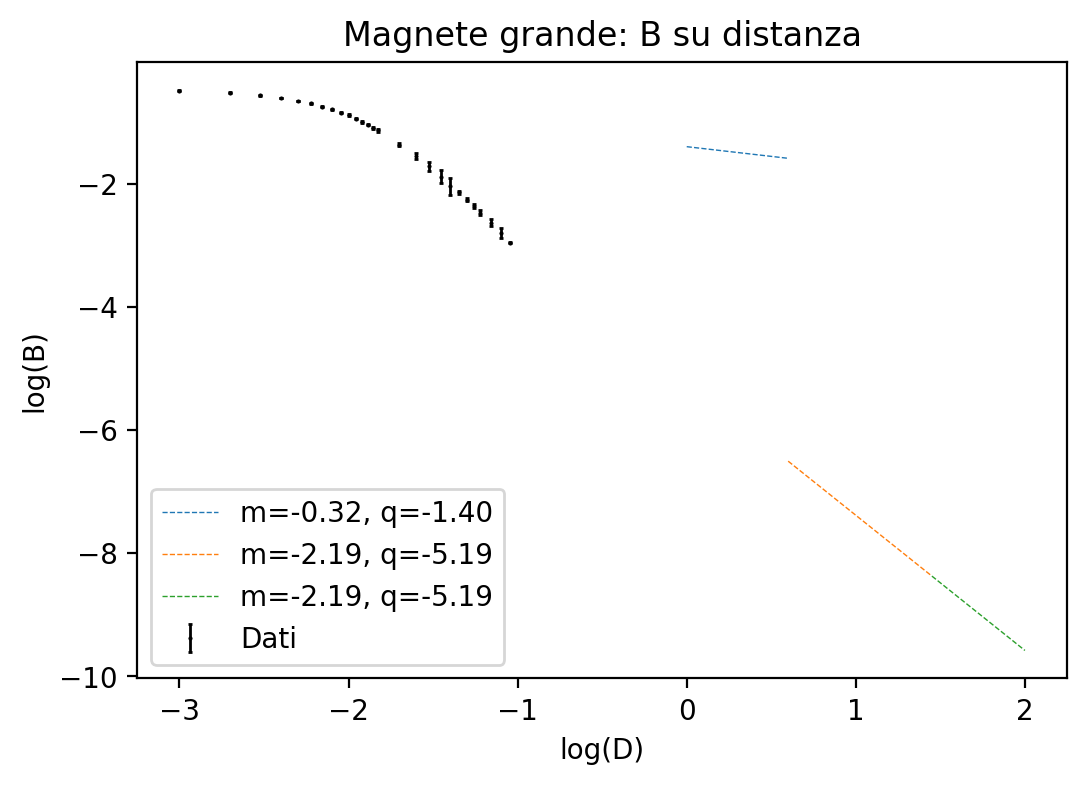

In [19]:
# Legge il file ignorando la prima riga (intestazione)
dati1 = np.loadtxt("data/magnete_grande_su_d.csv", skiprows=1)

d1 = dati1[:,1]   # ascissa
B1 = dati1[:,0]   # ordinata
err_B1 = dati1[:,2] # errore su B

## TOGLIERE IL PRIMO PUNTO? ##
d1 = d1[1:]   
B1 = B1[1:]   
err_B1 = err_B1[1:]*3

# CONVERTO IN METRI? #
d1 = d1 / 1000

# LOGARITMI
log_d1 = np.log10(d1)
log_B1 = np.log10(B1)
err_log_B1 = err_B1 / (B1 * np.log(10)) # Propagazione dell'errore

# FIT #
low = (-np.inf, -np.inf)
upp = (np.inf, np.inf)

# divido in tre regioni:
mask1_1 = (log_d1 < -2)
mask1_2 = (log_d1 > -2) & (log_d1 < -1)
mask1_3 = (log_d1 > -2) 
# regione 1
x1_1, y1_1, erry1_1 = log_d1[mask1_1], log_B1[mask1_1], err_log_B1[mask1_1]
popt1_1, pcov1_1 = curve_fit(retta, x1_1, y1_1, sigma=erry1_1, bounds=(low,upp))
# regione 2
x1_2, y1_2, erry1_2 = log_d1[mask1_2], log_B1[mask1_2], err_log_B1[mask1_2]
popt1_2, pcov1_2 = curve_fit(retta, x1_2, y1_2, sigma=erry1_2, bounds=(low,upp))
# regione 3
x1_3, y1_3, erry1_3 = log_d1[mask1_3], log_B1[mask1_3], err_log_B1[mask1_3]
popt1_3, pcov1_3 = curve_fit(retta, x1_3, y1_3, sigma=erry1_3, bounds=(low,upp))

plt.figure(figsize=(6, 4), dpi=200)
# dati
plt.errorbar(
    log_d1, log_B1, yerr=err_log_B1,
    fmt='o',  # Solo marker, senza linee tra i punti
    markersize=0.5,  # Dimensione dei marker leggermente aumentata
    elinewidth=1,  # Spessore delle barre d'errore ridotto per leggibilità
    capsize=0.8,  # Aggiunge terminali alle barre d'errore
    capthick=1,  # Spessore dei terminali
    color='black',  # Colore neutro per evitare distrazioni
    label='Dati'
)
# PLOT FIT #
# regione 1
x_fit1_1 = np.linspace(0, 0.6, 30)
y_fit1_1 = retta(x_fit1_1, *popt1_1)
etichetta1 = f"m={popt1_1[0]:.2f}, q={popt1_1[1]:.2f}"
plt.plot(x_fit1_1, y_fit1_1, linestyle='--', label=etichetta1, linewidth=0.5)
# regione 2
x_fit1_2 = np.linspace(0.6, 1.45, 30)
y_fit1_2 = retta(x_fit1_2, *popt1_2)
etichetta2 = f"m={popt1_2[0]:.2f}, q={popt1_2[1]:.2f}"
plt.plot(x_fit1_2, y_fit1_2, linestyle='--', label=etichetta2, linewidth=0.5)
# regione 1
x_fit1_3 = np.linspace(1.45, 2, 30)
y_fit1_3 = retta(x_fit1_3, *popt1_3)
etichetta3 = f"m={popt1_3[0]:.2f}, q={popt1_3[1]:.2f}"
plt.plot(x_fit1_3, y_fit1_3, linestyle='--', label=etichetta3, linewidth=0.5)

plt.xlabel("log(D)") # [mm]
#plt.yscale('log')
plt.ylabel("log(B)") # [T]
plt.title("Magnete grande: B su distanza")
plt.legend()
plt.show()